<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science  - Regresión Lineal</h1>

# <font color='red' style='font-size: 30px;'>Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Bibliotecas opcionales

https://docs.python.org/3/library/warnings.html

In [9]:
import warnings
warnings.filterwarnings("ignore") # permite ignorar notificaciones de bibliotecas

#warnings.filterwarnings(action = 'once')
# warnings.filterwarnings(action = 'once') permite que la notificación aparezca una sola vez en el NoteBoook

## El Dataset y el Proyecto
<hr>

### Fuente: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>La cerveza es una de las bebidas más democráticas y consumidas del mundo. No sin razón, es perfecta para casi todas las situaciones, desde el happy hour hasta las grandes fiestas de bodas.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El objetivo de este proyecto es estimar un modelo de <b>Machine Learning</b> utilizando la técnica de <b>Regresión Lineal</b> para demostrar los impactos de las variables disponibles en este dataset sobre el consumo de cerveza (Y). Al final del proyecto, tendremos un modelo de predicción para el consumo medio de cerveza según los inputs de un conjunto de variables (X's).</p>


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los datos (muestra) fueron recolectados en São Paulo - Brasil, en un área universitaria, donde hay algunas fiestas con grupos de estudiantes de 18 a 28 años (en media).</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>fecha</b> - Fecha</li>
    <li><b>temp_media</b> - Temperatura Media (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>lluvia</b> - Precipitación (mm)</li>
    <li><b>fds</b> - Fin de Semana (1 = Sí; 0 = No)</li>
    <li><b>consumo</b> - Consumo de Cerveza (litros)</li>
</ul>

## Lectura de los datos

In [10]:
datos = pd.read_csv('Consumo_cerveza.csv', sep = ';')


## Ver los datos

In [11]:
datos.head(10)

,fecha,temp_media,temp_min,temp_max,lluvia,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
5,06/01/2015,23.78,20.1,30.5,12.2,0,28218
6,07/01/2015,24.00,19.5,33.7,0.0,0,29732
7,08/01/2015,24.90,19.5,32.8,48.6,0,28397
8,09/01/2015,28.20,21.9,34.0,4.4,0,24886
9,10/01/2015,26.76,22.1,34.2,0.0,1,37937


## Verificando el tamaño del dataset

In [12]:
datos.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Analisis preliminar</font>

<hr style='border: 2px solid red;'>

## Estadísticos descriptivos

In [13]:
datos.describe().round(2)

,temp_media,temp_min,temp_max,lluvia,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta.</p>

Cada elemento de la matriz representa una medida de asociación lineal entre dos variables, cuyo valor oscila entre -1 y +1. Un coeficiente de +1 indica una relación positiva perfecta, donde ambas variables aumentan o disminuyen juntas proporcionalmente; un coeficiente de -1 señala una relación negativa perfecta, donde una variable aumenta mientras la otra disminuye de manera proporcional; y un valor cercano a 0 sugiere una relación lineal débil o inexistente. Esta matriz es especialmente útil en el análisis exploratorio de datos, ya que permite identificar relaciones fuertes, débiles o nulas entre variables, facilitando la selección de características relevantes para modelos predictivos y detectando problemas como la multicolinealidad. Además, su visualización en forma de mapa de calor simplifica la interpretación, destacando patrones importantes en datasets complejos.

- En modelos de regresión lineal, es importante verificar si las variables explicativas (X’s) tienen una fuerte correlación con la variable dependiente (Y).
- En modelos de regresión lineal, es importante que las variables explicativas (X’s) no tengan una fuerte correlación entre sí.


In [14]:
# Excluir la columna 'fecha' y seleccionar solo las columnas numéricas
datos_numericos = datos.drop(columns=['fecha']).select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
matriz_correlacion = datos_numericos.corr().round(4)

# Mostrar la matriz de correlación
print(matriz_correlacion)

            temp_media  temp_min  temp_max  lluvia     fds  consumo
temp_media      1.0000    0.8628    0.9225  0.0244 -0.0508   0.5746
temp_min        0.8628    1.0000    0.6729  0.0986 -0.0595   0.3925
temp_max        0.9225    0.6729    1.0000 -0.0493 -0.0403   0.6427
lluvia          0.0244    0.0986   -0.0493  1.0000  0.0016  -0.1938
fds            -0.0508   -0.0595   -0.0403  0.0016  1.0000   0.5060
consumo         0.5746    0.3925    0.6427 -0.1938  0.5060   1.0000


Para predecir el consumo se utilizaran las variables tem_max, lluvia, fds (Fin de Semana).Puesto que,  temp_media y  temp_min tienen una relacion muy fuerte con  temp_max. lo cual puede generar problemas de estimación para el modelo

Lo que aprendimos:

- Cómo importar bibliotecas
- Cómo leer y ver los datos
- Cómo comprobar el tamaño del dataset
- Cómo crear una tabla con estadísticos descriptivos de los datos del dataset
- Creación de una matriz de correlación de los datos

# <font color='red' style='font-size: 30px;'>Comportamiento de la variable dependiente (Y)</font>
<hr style='border: 2px solid red;'>

# Análisis grafico

## Dibujando el plot de la variable *dependiente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

Text(0.5, 0, 'Días')

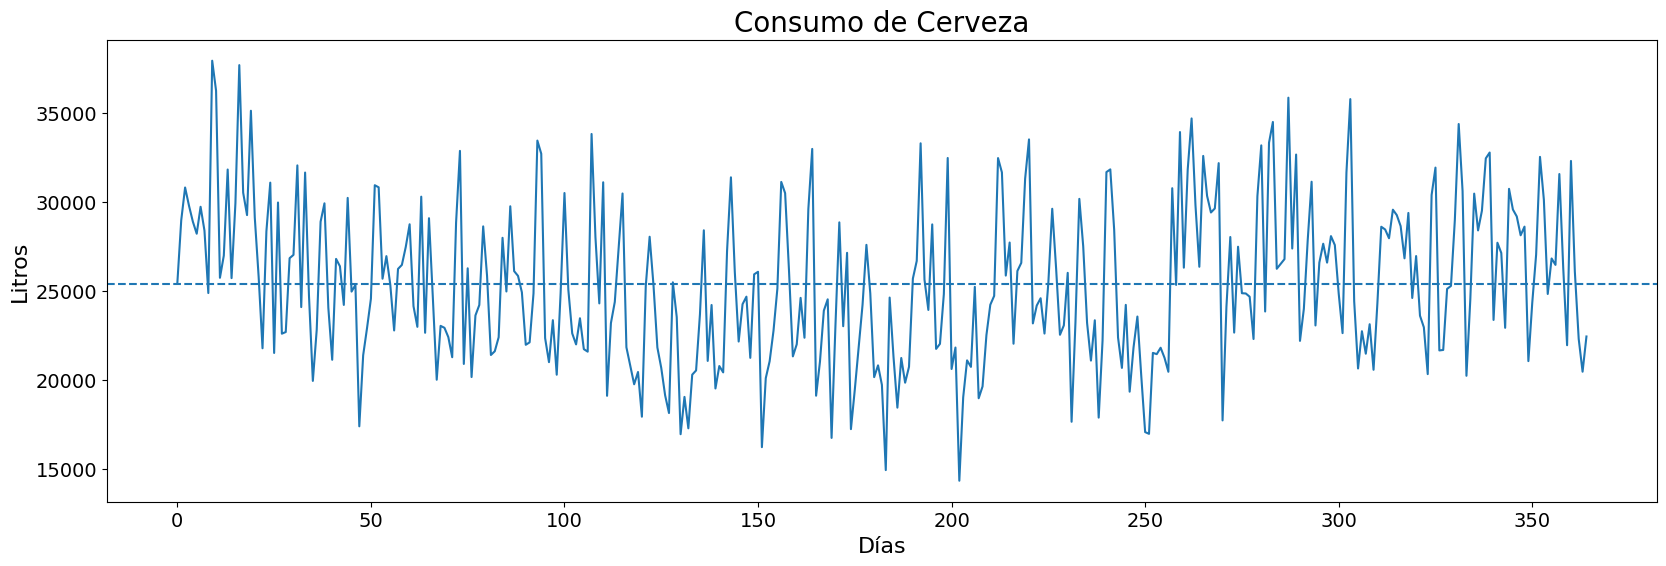

In [15]:
# El siguiente Gráfico muesta la evolución del Consumo a lo largo del año 2015
fig, ax = plt.subplots(figsize = (20, 6))
ax= datos['consumo'].plot(fontsize=14)
ax.axhline(y= np.mean(datos['consumo']),ls='--') # Agrega una línea discontinua que representa el promedio de la variable consumo, el cula de acuerdo con los estadisticos descriptivos es de 25401.3 litros de cerveza
ax.set_title('Consumo de Cerveza', fontsize = 20)# Agrega un titulo al grafico y modifica a 20 el tamaño de la fuente
ax.set_ylabel('Litros', fontsize = 16) # Agrega un titulo al eje Y
ax.set_xlabel('Días', fontsize = 16) # Agrega un titulo al eje X

**Análisis de la evolución temporal de la varible consumo**

En el gráfico se observa que el consumo no presenta cambios estructurales, manteniendo una tendencia constante. Esto permite trabajar con una regresión lineal para su análisis. Por el contrario, cuando una serie de datos muestra cambios estructurales o un comportamoento de Random Walk es recomendable utilizar modelos más avanzados para obtener resultados más precisos.

Random Walk: Son series temporales que presentan grandez desviaciones de su promedio sin tendencia a revertir a su media.

En Conclusión, para poder utilizar la regresión lineal la serie debe oscilar o variar alrededor de su media sin mostrar desviaciones largas o sitematicas de su media, esto es lo que se conoce como una serie Estacionaria en su media

# <font color='red' style='font-size: 30px;'>Box Plot (Diagrama de caja)</font>



<hr style='border: 2px solid red;'>

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.</p>

In [16]:
import seaborn as sns

## Box plot de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'Consumo de Cerveza'}, xlabel='Litros'>

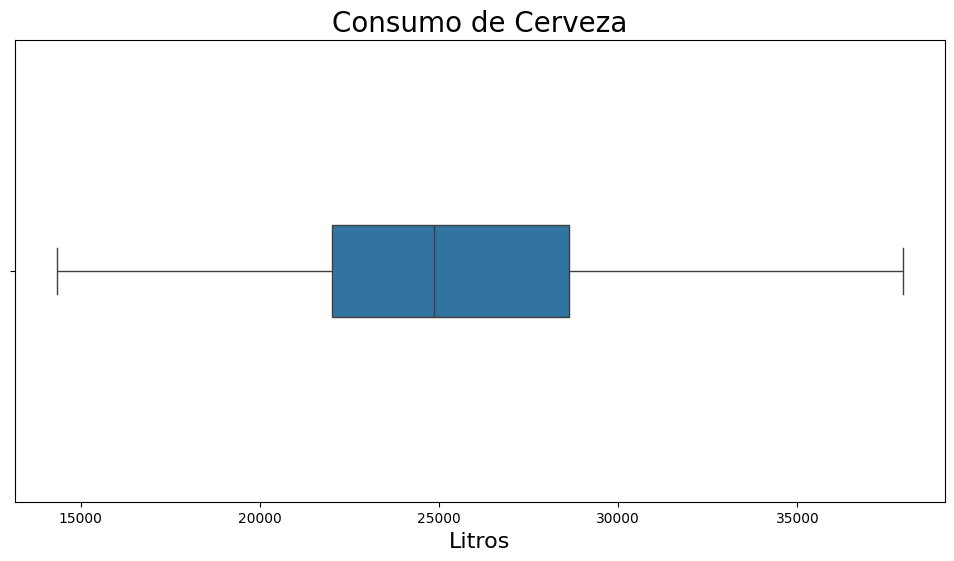

In [17]:
ax= sns.boxplot(datos['consumo'],orient='h', width=0.2) # orient='h' o orient='v' Permite cambiar la orientación del gráfico de horizaontal a vertical. width=0.2 Modifica el ancho de las cajas del gráfico BoxPlot
ax.figure.set_size_inches(12,6) # Ajusta el tamaño de la figura
ax.set_title('Consumo de Cerveza', fontsize = 20)# Agrega un titulo al grafico y modifica a 20 el tamaño de la fuente
ax.set_xlabel('Litros', fontsize = 16) # Agrega un titulo al eje X
ax

Como no se observan datos fuera de los límites se puede afirmar que no hay presencia de datos atípicos en el consumo de cerveza. La media de los datos es ligeramente simétria por lo que es posible continuar con el análisis de regresión lineal.

# <font color='red' style='font-size: 30px;'>Box Plot con Dos Variables</font>
<hr style='border: 2px solid red;'>

## Analizar la variable *dependiente* (y) de acuerdo con una característica dada, la cual corresponde en este caso a la variable fin de semana

<Axes: title={'center': 'Consumo de Cerveza'}, xlabel='Fin de Semana', ylabel='Litros'>

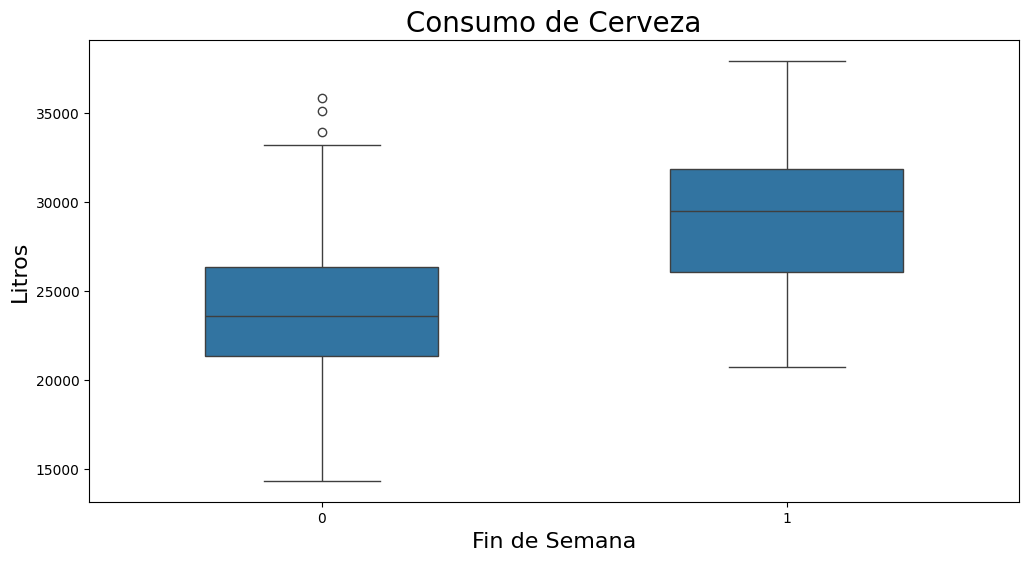

In [18]:
ax= sns.boxplot(y= 'consumo', x= 'fds', data=datos, orient='v', width=0.5) # orient='h' o orient='v' Permite cambiar la orientación del gráfico de horizaontal a vertical. width=0.2 Modifica el ancho de las cajas del gráfico BoxPlot
ax.figure.set_size_inches(12,6) # Ajusta el tamaño de la figura
ax.set_title('Consumo de Cerveza', fontsize = 20)# Agrega un titulo al grafico y modifica a 20 el tamaño de la fuente
ax.set_ylabel('Litros', fontsize = 16) # Agrega un titulo al eje X
ax.set_xlabel('Fin de Semana', fontsize = 16) # Agrega un titulo al eje X
ax

El eje y muestra la cantidad de litros de cerveza, el eje x muestra 0 para los días que No son fín de semana y 1 para los días que son fín de semana.

Al comparar los dos gráficos es posible observar que basado en el estadistico promedio de los gráficos BoxPlot el consumo de Cerveza tiende a caer cuando No es Fín de Semana y aumenta cuan es fín de semana.

Los Outliers para los días que No son fín de semana pueden representar días festivos que generaron un consumo muy alto de Cerveza. por lo que es posible aplicar una variable Dummy donde 1 represente dias festivos y 0 dias de la semana.

## Configuración de color y estilo de la biblioteca *seaborn*

### Control de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de colores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [19]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

sns.set_palette('Accent') # Para cambiar el color
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('whitegrid') # Para cambiar el estilo

<Axes: title={'center': 'Consumo de Cerveza'}, xlabel='Fin de Semana', ylabel='Litros'>

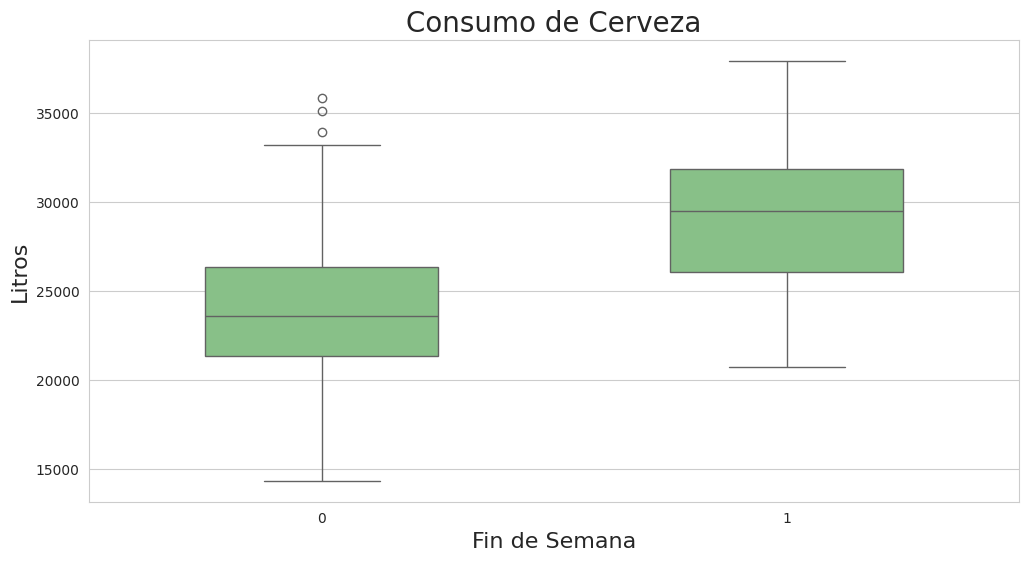

In [20]:
ax= sns.boxplot(y= 'consumo', x= 'fds', data=datos, orient='v', width=0.5) # orient='h' o orient='v' Permite cambiar la orientación del gráfico de horizaontal a vertical. width=0.2 Modifica el ancho de las cajas del gráfico BoxPlot
ax.figure.set_size_inches(12,6) # Ajusta el tamaño de la figura
ax.set_title('Consumo de Cerveza', fontsize = 20)# Agrega un titulo al grafico y modifica a 20 el tamaño de la fuente
ax.set_ylabel('Litros', fontsize = 16) # Agrega un titulo al eje X
ax.set_xlabel('Fin de Semana', fontsize = 16) # Agrega un titulo al eje X
ax

Aprendimos cómo construir boxplots cruzando información de dos variables en nuestro dataset. Esta técnica de visualización nos ayuda a identificar diferencias en la distribución de una variable cuando la separamos en ciertas categorías.

Usando nuestro dataset, ejecutaremos el siguiente código para obtener el boxplot del consumo de cerveza según la variable de fin de semana de manera horizontal:


<Axes: title={'center': 'Consumo de Cerveza'}, xlabel='Litros', ylabel='Final de Semana'>

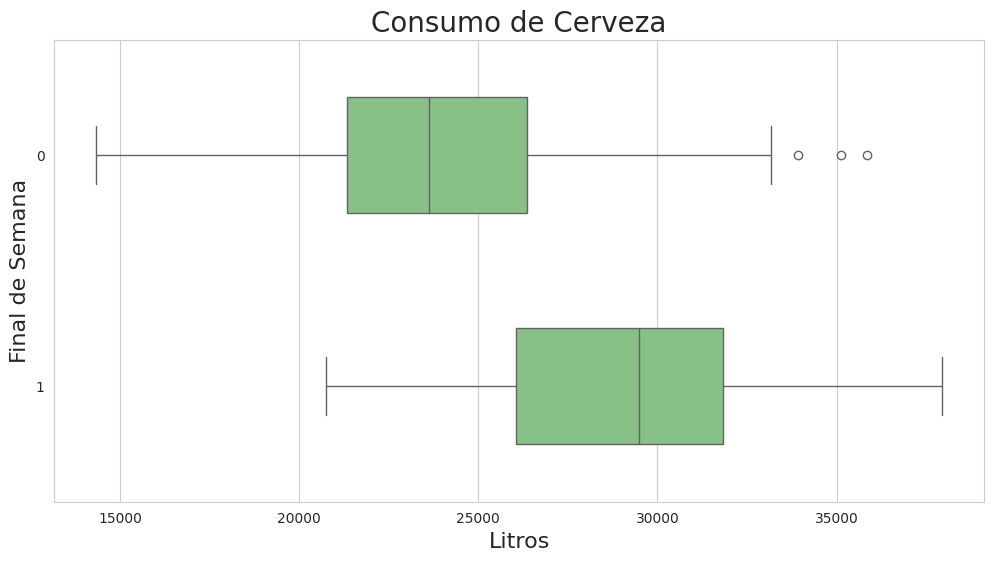

In [21]:
ax = sns.boxplot(y='fds', x='consumo', data=datos,    orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveza', fontsize=20)
ax.set_xlabel('Litros', fontsize=16)
ax.set_ylabel('Final de Semana', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Distribución de frecuencias (Histograma)</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)
La idea es que la distribución de la variable dependiente sea similiar o se acerque a la forma de la distribución normal, en el gráfico BoxPlot tenidriamos un grafico completamente simétrico

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<Axes: title={'center': 'Distribución de Frecuencias'}, xlabel='Consumo de Cerveza (Listros)', ylabel='Density'>

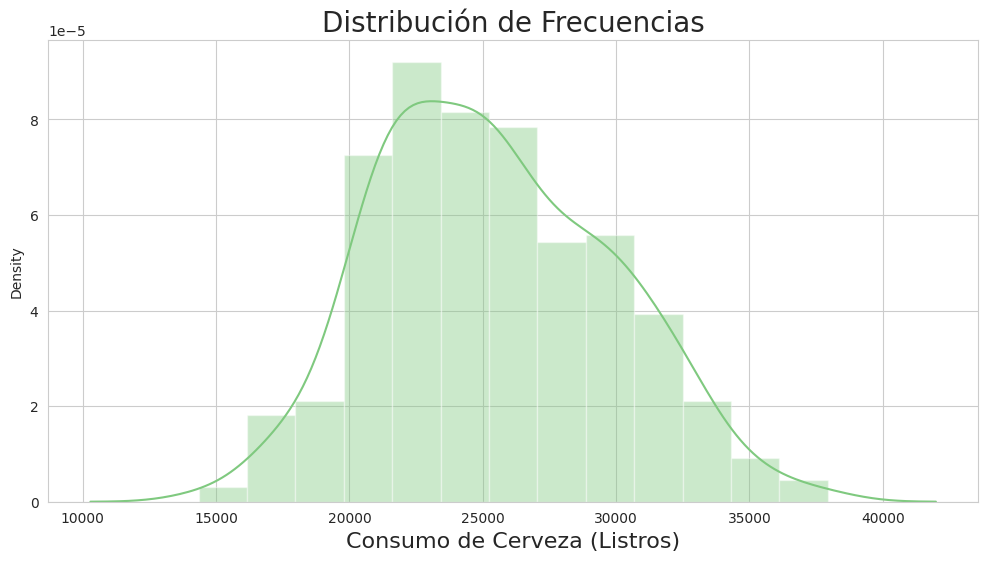

In [22]:
ax= sns.distplot(datos['consumo'])
ax.figure.set_size_inches(12,6) # Ajusta el tamaño de la figura
ax.set_title('Distribución de Frecuencias', fontsize = 20)# Agrega un titulo al grafico y modifica a 20 el tamaño de la fuente
ax.set_xlabel('Consumo de Cerveza (Listros)', fontsize = 16) # Agrega un titulo al eje X
ax

Lo que aprendimos:

- Cómo graficar la variable dependiente
- Cómo importar la biblioteca seaborn
- Cómo crear un boxplot de la variable dependiente
- Cómo crear un boxplot de dos variables
- Cómo configurar los estilos y colores de la biblioteca seaborn
- Cómo hacer un histograma de la variable dependiente

# <font color='red' style='font-size: 30px;'>Variable Dependiente X Variables Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión (scatterplots) entre las variables del dataset

## seaborn.pairplot
La función sns.pairplot() de la biblioteca Seaborn es un método que genera una cuadrícula de gráficos para explorar las relaciones entre múltiples variables en un conjunto de datos.

Se utiliza principalmente para:

Visualizar distribuciones univariadas y bivariadas.
Identificar patrones o relaciones entre pares de variables.
Explorar grupos en los datos mediante colores (usando el argumento hue).

> Añadir blockquote



https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

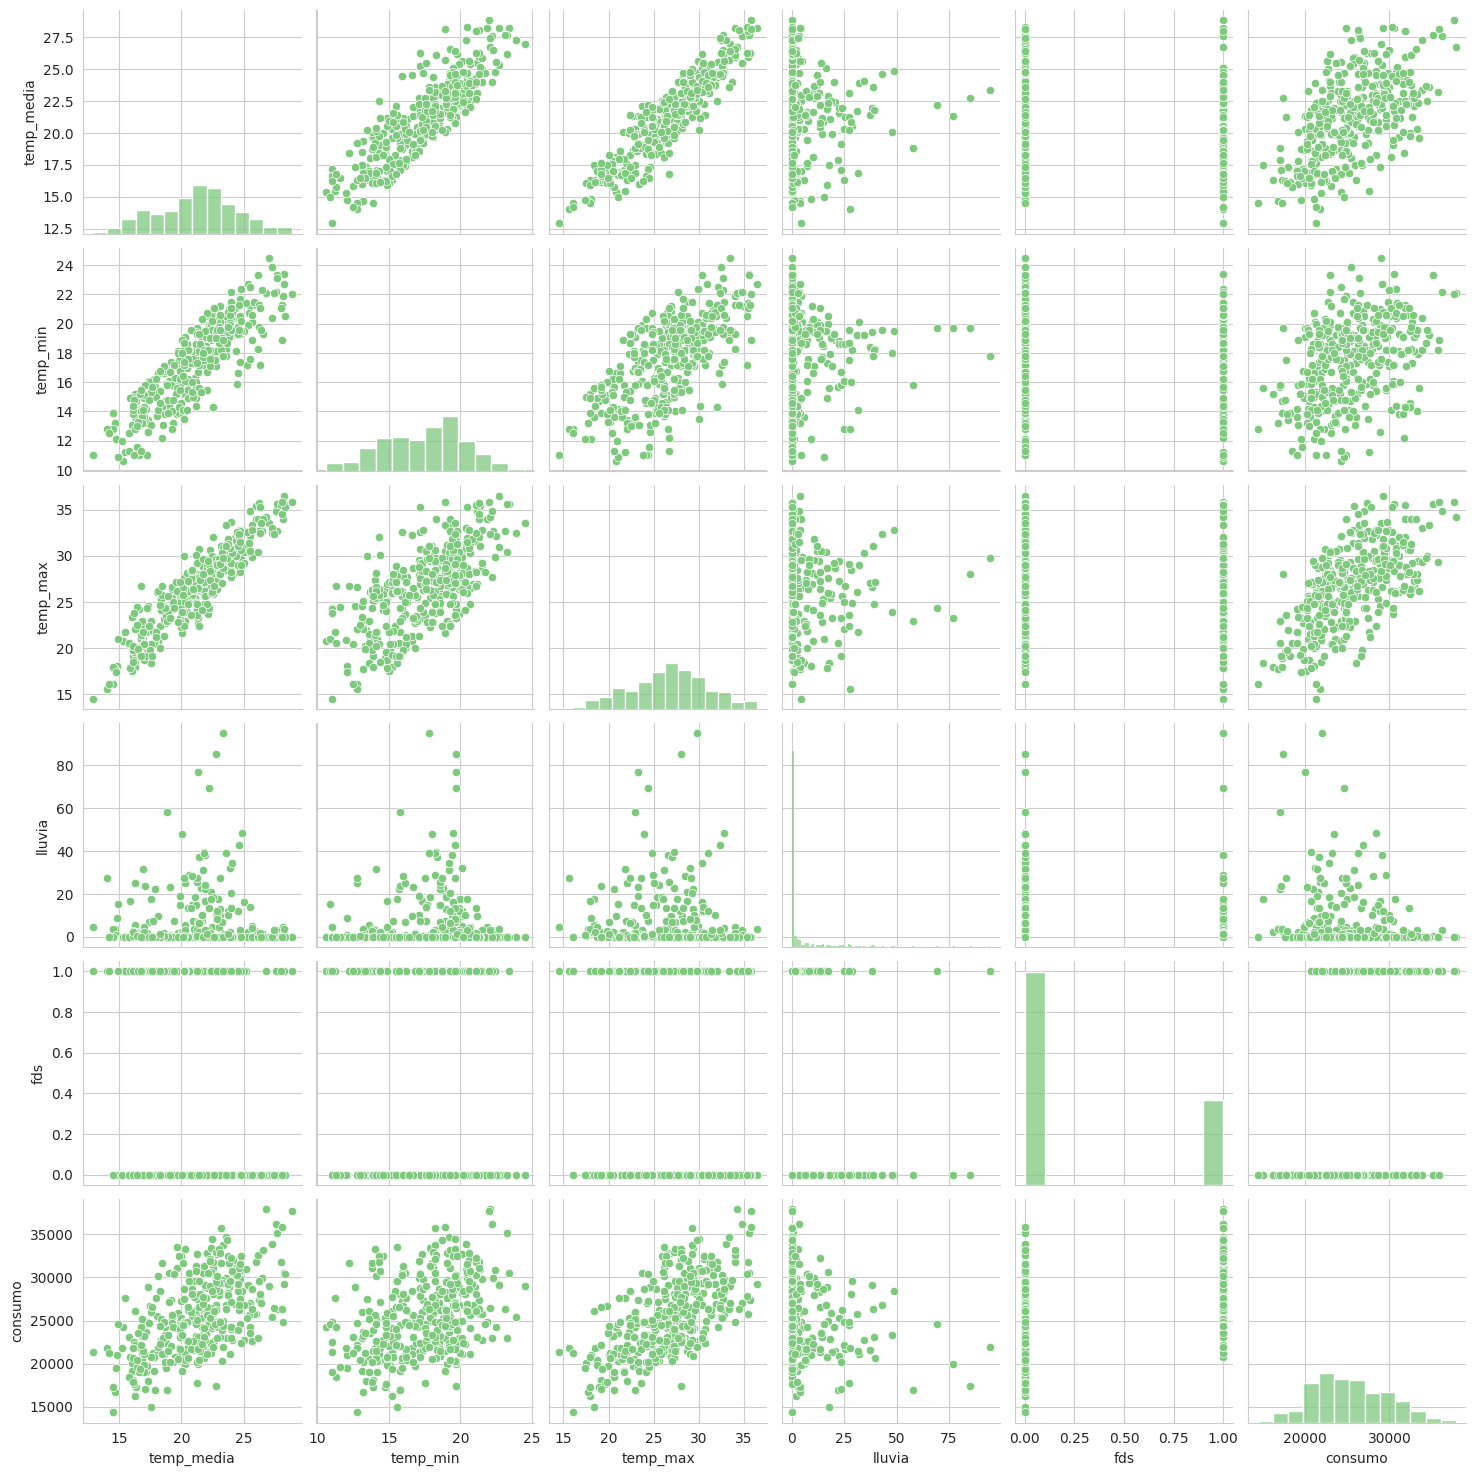

In [23]:
ax = sns.pairplot(datos)
# Cuando tenemos pocas variables no hay problema, pero cuando trabajamos con muchas variables es dificil la lectura

## Graficar el pairplot fijando solo una variable en el eje y.

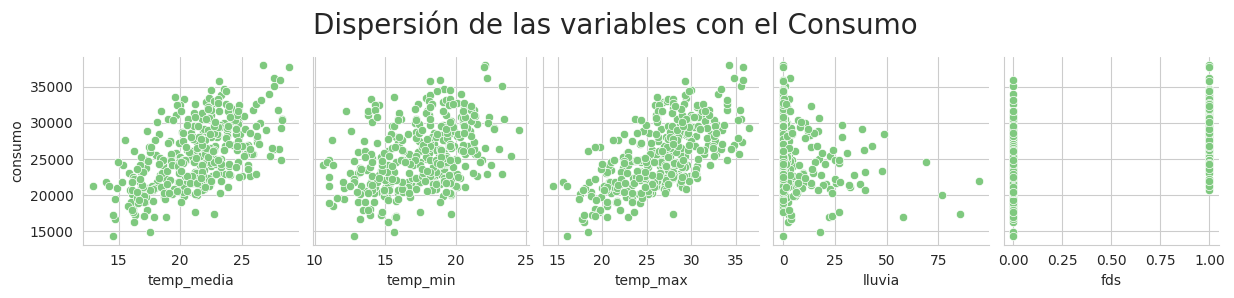

In [24]:
# Nos centramos en la ultima fila correspondiente al Consumo
ax =sns.pairplot(datos, y_vars='consumo', x_vars=['temp_media', 'temp_min', 'temp_max', 'lluvia', 'fds'], diag_kind= None ) # 'diag_king = None ' Ignora las diagonales
ax.fig.suptitle('Dispersión de las variables con el Consumo', fontsize = 20, y= 1.15) # Con 'fontsize = 20, y= 1.15' alejamos el titulo del gráfico
ax


**Análisis del Gráfico **


- El consumo se relaciona más con temp_max ya que su dispercion se ajusta a la media y en la medida que incrementa la temperatura el consumo tambien lo hace. mientras que temp_max y temp_min tienen datos muchos mas dispersos

- Con respecto a la Luvia la mayor parte de los datos se concentran en 0 y una tendencia a la baja del consumo. Por tanto cuanto mas lluvia menor consumo de Cerveza.

- Finalmente, El Fín de Semana es una variable categórica donde se observa que el aumento del Consumo de Cerveza esta durante los fines de semana

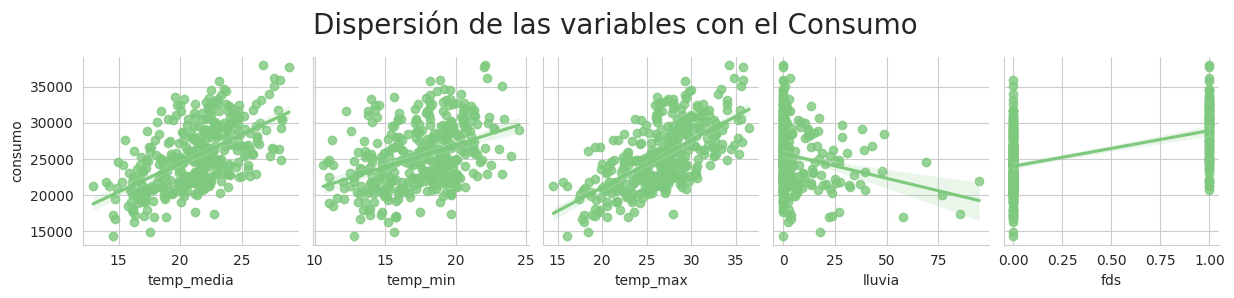

In [25]:
# La función 'pairplot()' permite incluir la función de regresión en los puntos agregando  kind = 'reg'

ax =sns.pairplot(datos, y_vars='consumo', x_vars=['temp_media', 'temp_min', 'temp_max', 'lluvia', 'fds'], diag_kind= None, kind = 'reg' ) # 'diag_king = None ' Ignora las diagonales
ax.fig.suptitle('Dispersión de las variables con el Consumo', fontsize = 20, y= 1.15) # Con 'fontsize = 20, y= 1.15' alejamos el titulo del gráfico
ax

**kind = 'reg'** se utiliza en algunas funciones para indicar que el gráfico que se va a generar debe incluir una línea de regresión. Es una opción que generalmente se utiliza en gráficos de dispersión (scatterplots) para visualizar la relación lineal entre dos variables.

Al trazar la línea de regresión es facil observar que la variable que mejor se ajusta al Consumo es **'temp_max'**

# <font color='red' style='font-size: 30px;'>Variable Dependiente X Variables Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

La función sns.jointplot() en la biblioteca Seaborn se utiliza para crear una visualización combinada de dos variables, que muestra tanto la relación **bivariada** entre las variables como sus **distribuciones univariadas.** Es una herramienta muy útil para explorar y visualizar cómo se relacionan dos variables numéricas, al mismo tiempo que se visualizan sus distribuciones individuales en los ejes X y Y

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre dos variables y sus respectivas distribuciones de frecuencia.</p>

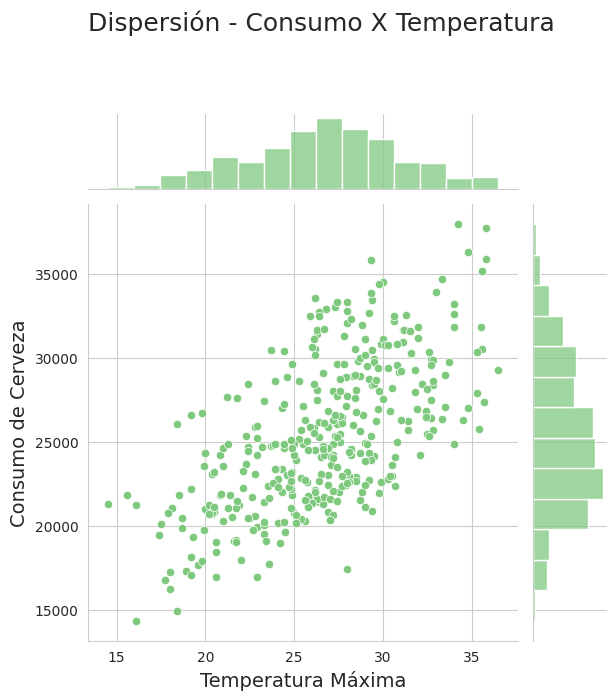

In [26]:
ax = sns.jointplot(x= 'temp_max', y= 'consumo', data= datos)
ax.fig.suptitle('Dispersión - Consumo X Temperatura', fontsize = 18, y= 1.15) # Con 'fontsize = 18, y= 1.15' alejamos el titulo del gráfico
ax.set_axis_labels('Temperatura Máxima',  'Consumo de Cerveza', fontsize = 14)
ax

Este Gráfico muestra la distribución de frecuencias de las dos variables, el Consumo en el eje del lado derecho  y la Temperatura Máxima en la parte superior

## Graficar un jointplot con la recta de regresión estimada

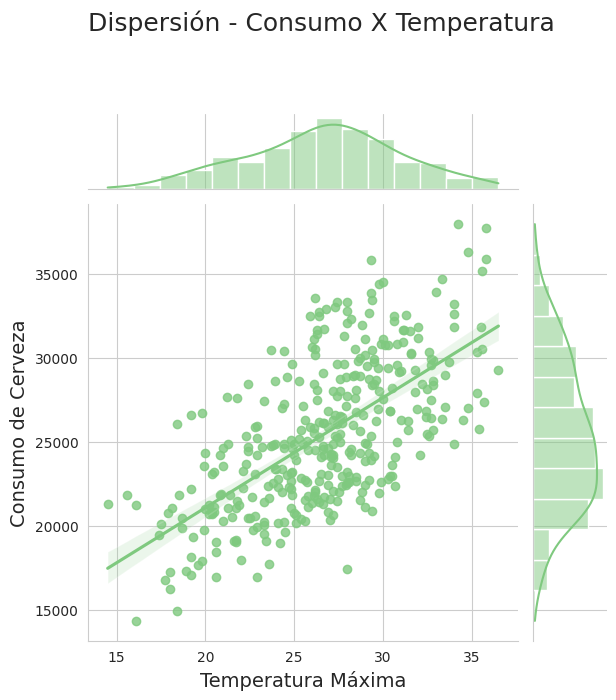

In [27]:
ax = sns.jointplot(x= 'temp_max', y= 'consumo', data= datos, kind = 'reg')
ax.fig.suptitle('Dispersión - Consumo X Temperatura', fontsize = 18, y= 1.15) # Con 'fontsize = 18, y= 1.15' alejamos el titulo del gráfico
ax.set_axis_labels('Temperatura Máxima',  'Consumo de Cerveza', fontsize = 14)
ax

# <font color='red' style='font-size: 30px;'>Variable Dependiente X Variables Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

En Seaborn, el método lmplot se utiliza para crear gráficos de dispersión con una línea de regresión ajustada. Este gráfico es muy útil para visualizar la relación entre dos variables numéricas, y te permite ver cómo una variable se ajusta a la otra a través de una línea de regresión. Es especialmente útil cuando deseas entender tendencias o correlaciones entre variables.


## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Trazar la recta de regresión entre dos variables junto con la dispersión entre ellas.</p>

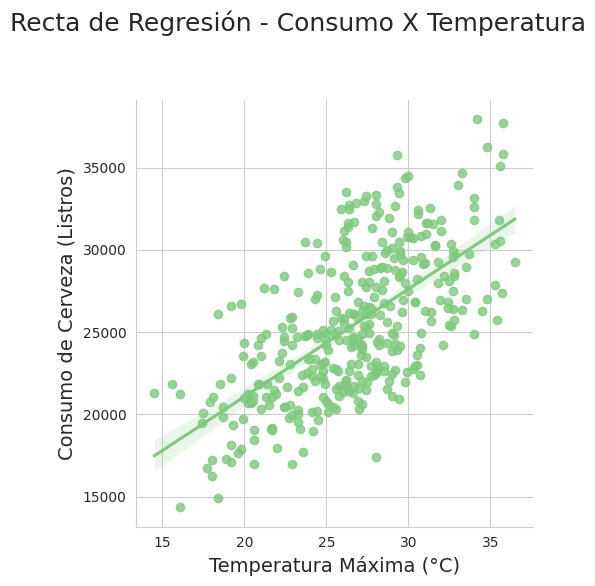

In [28]:
ax = sns.lmplot(x= 'temp_max', y= 'consumo', data= datos)
ax.fig.suptitle('Recta de Regresión - Consumo X Temperatura', fontsize = 18, y= 1.15) #  alejamos el titulo del gráfico
ax.set_xlabels('Temperatura Máxima (°C)', fontsize = 14) # Agrega un titulo al eje X
ax.set_ylabels('Consumo de Cerveza (Listros)', fontsize = 14) # Agrega un titulo al eje y
ax

Hasta el momento tenemos el mismo grafico de disperción anterior entre el Consumo d eCerveza y la Temperatura Máxima

## Graficar un lmplot con una tercera variable en el análisis (tipo I).

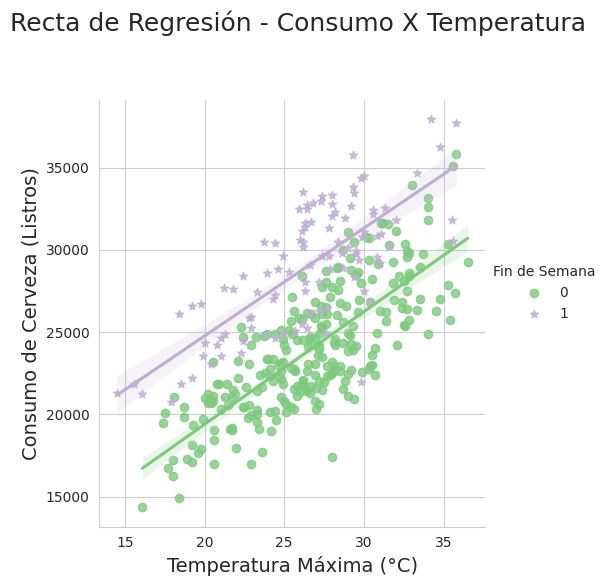

In [29]:
ax = sns.lmplot(x= 'temp_max', y= 'consumo', data= datos, hue= 'fds', markers= ['o','*'], legend = False) # 'legend = False' permite modificar la leyenda del gráfico
ax.fig.suptitle('Recta de Regresión - Consumo X Temperatura', fontsize = 18, y= 1.15) #  alejamos el titulo del gráfico
ax.set_xlabels('Temperatura Máxima (°C)', fontsize = 14) # Agrega un titulo al eje X
ax.set_ylabels('Consumo de Cerveza (Listros)', fontsize = 14) # Agrega un titulo al eje y
ax.add_legend(title = 'Fin de Semana')
ax

Se separarn los valores de Consumo y Temperatura Máxima con una tercera variable que en este caso es Fín de Semana. lo anterior, con el objetivo de ver el efecto de esta variable en la relación Consumo y Temperatura Máxima.

Como resultado tenemos dos rectas de regresión ajustadas en cada categoria, donde el cambio de nivel de Consumo de Cerveza se presenta los fines de semana


## Graficar un lmplot con una tercera variable en el análisis (tipo II).

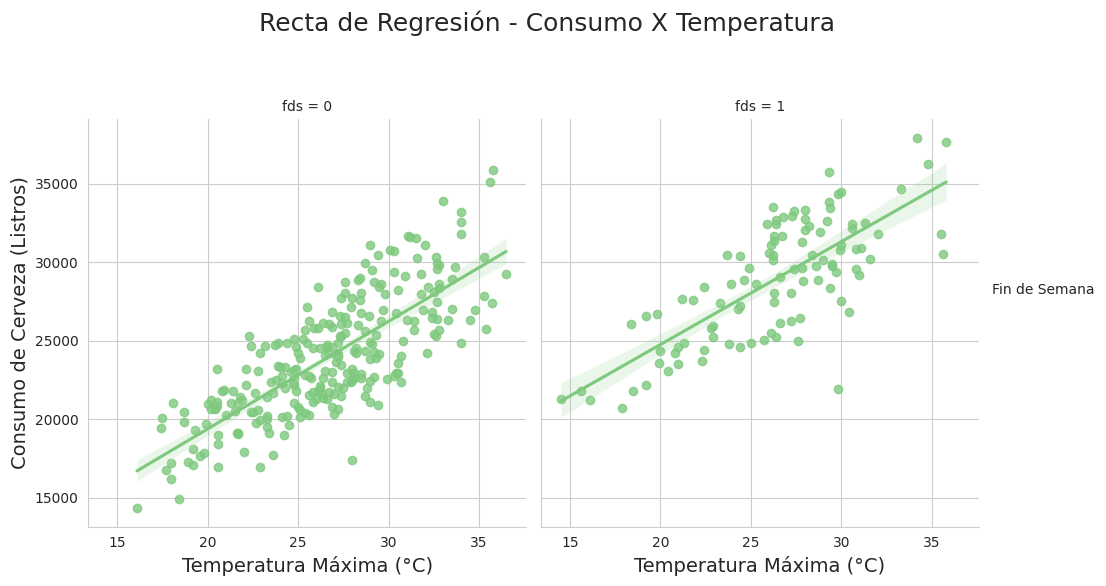

In [30]:
ax = sns.lmplot(x= 'temp_max', y= 'consumo', data= datos, col= 'fds')
ax.fig.suptitle('Recta de Regresión - Consumo X Temperatura', fontsize = 18, y= 1.15) #  alejamos el titulo del gráfico
ax.set_xlabels('Temperatura Máxima (°C)', fontsize = 14) # Agrega un titulo al eje X
ax.set_ylabels('Consumo de Cerveza (Listros)', fontsize = 14) # Agrega un titulo al eje y
ax.add_legend(title = 'Fin de Semana')
ax

Este es el mismo gráfico anterior pero devidido en 2 gráficos. 0 para cuando No es fína de Semana y 1 para cuando es Fín de Semana.

La función lmplot() de seaborn es otra herramienta más para analizarnos la dispersión de datos en un modelo. Como pairplot() y jointplot(), la función lmplot() permite graficar la dispersión entre dos variables y también trazar la línea de regresión estimada entre ellas.

Lo que aprendimos:

- Cómo graficar diagramas de dispersión entre las variables del dataset con pairplot, jointplot y lmplot
- Cómo ocultar o modificar para ver los warnings de Google Colab solo una vez

# <font color='red' style='font-size: 30px;'>Estimando un Modelo de Regresión Lineal para el Consumo</font>
<hr style='border: 2px solid red;'>

# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El *scikit-learn* es un módulo de Python especializado en soluciones para *machine learning*.</p>



## Importando el *train_test_split* de la biblioteca *scikit-learn*


El método train_test_split de la biblioteca scikit-learn se utiliza para dividir un conjunto de datos en dos partes: una para entrenar un modelo de machine learning (conjunto de entrenamiento) y otra para evaluar su desempeño (conjunto de prueba). Esta división es fundamental para evitar el sobreajuste y para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [31]:
from sklearn.model_selection import train_test_split

Esta función nos pide dos parámetros de entrada: el primero es el DataFrame que contiene la variable dependiente y el segundo es el DataFrame que contiene las variables explicativas. Tal como se muestra a continuación:

## Creando una Series (pandas) para almacenar el Consumo de Cerveza (y).

In [32]:
y = datos['consumo']

## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [33]:
#x= datos[['temp_max', 'temp_min', 'temp_media', 'lluvia', 'fds']]
x= datos[['temp_max',  'lluvia', 'fds']]

## Creando los datasets de entrenamiento y de prueba

Esta función nos devuelve una lista de 4 elementos donde se asignamos a cada elemento su contenido respetando el orden en el que aparece en la lista.

**X_train:** Es el conjunto de entrenamiento, que contiene los valores de las variables explicativas (características) utilizadas para entrenar el modelo.

**X_test:** Es el conjunto de prueba, que contiene los valores de las variables explicativas (características) utilizadas para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

**y_train:** Es el conjunto de entrenamiento, que contiene las etiquetas o valores correspondientes a los datos de entrenamiento. Son los resultados que el modelo debe aprender a predecir.

**y_test:** Es el conjunto de prueba, que contiene las etiquetas o valores correspondientes a los datos de prueba. Se utilizan para comparar las predicciones del modelo con los resultados reales y evaluar su desempeño.



In [34]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2811)
#test_size es el porcentaje en el que se separa el conjunto de prueba en este caso es del 30% y el 70% restante se asignará al conjunto de entrenamiento


En train_test_split, el parámetro random_state se utiliza para controlar la aleatoriedad en el proceso de división de los datos en conjuntos de entrenamiento y prueba.

¿Qué hace random_state en train_test_split?
Cuando divides tu conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba, train_test_split realiza esta división de forma aleatoria. Sin embargo, si ejecutas el mismo código varias veces, obtendrás diferentes divisiones de los datos (diferentes muestras para entrenamiento y prueba) cada vez.

Al establecer el valor de random_state, le estás dando al generador de números aleatorios una "semilla" fija. Esto significa que la división se realizará de la misma manera cada vez que ejecutes el código, asegurando que la aleatoriedad sea reproducible.

## Comprobando los tamaños de los archivos generados por la función *train_test_split*.

In [35]:
X_train.shape
#Se asignaron 255 filas y 3 columnas (Variables Explcativas) al Conjunto de Entrenamiento

(255, 3)

In [36]:
X_test.shape
#Se asignaron 110 filas y 3 columnas (Variables Explcativas) al Conjunto de Prueba

(110, 3)

In [37]:
#Comprobamos sumando las filas
X_train.shape[0]+ X_test.shape[0]

365

In [38]:
x.shape[0]*0.3 # Conjunto de Prueba

109.5

In [39]:
x.shape[0]*0.7
#Conjunto de Entrenamiento, como no se puede tener números decimales  la función train_test_split asigno 0.5 del conjunto de entrenamiento al conjunto de prueba. Así se obtiene 255 para el conjunto de entrenamiento y 110 para el conjunto de prueba

255.49999999999997

La técnica de separar aleatoriamente un dataset en dos conjuntos distintos (conjuntos de entrenamiento y de prueba), estimar el modelo con los datos de uno de estos conjuntos (conjunto de entrenamiento) y luego hacer estimaciones con los datos del segundo conjunto (conjunto de prueba) es una técnica ampliamente utilizada en data science, para confirmar la efectividad del modelo estimado.

scikit-learn proporciona una función que hace esta separación, basta con que informemos los datos de nuestro modelo y cuál es el tamaño deseado de los conjuntos de entrenamiento y prueba. El código sería el siguiente:

train_test_split(X, y, test_size=0.3)

Donde X es nuestro conjunto de variables explicativas, y es nuestra variable dependiente y `test_size es el porcentaje de la base que queremos separar para la prueba, en el caso anterior, 30%.

Esta función devuelve, para el conjunto de variables explicativas (X), un conjunto de entrenamiento y uno de prueba (X_train y X_test), y para la variable dependiente (y), un conjunto de entrenamiento y otro de prueba (y_train y y_test). Donde el orden de devolución correcto para esta función es:


X_train, X_test, y_train, y_test

<img width='1000px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/reg_01.jpg'>

## Importando *LinearRegression* y *metrics* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics # Responsable de evaluar la calidad de estimación del modelo

## Instanciando la clase *LinearRegression()*

In [41]:
modelo = LinearRegression()

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [42]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [43]:
#Para obtener 'R²' se debe presionar en el teclado ALT + 1021
# score es la función que calcula el coeficiente de determinación R²
# Dentro de las llaves aparecerá el resultado de R cuadrado 'R² ={}'
print('R² ={}'.format(round(modelo.score(X_train,y_train), 2)))

R² =0.73


El 'R²' es una medida que evalua la capacidad de ajuste del modelo en los datos de enrtrenamiento

Esto quiere decir que el 73% de la variación media del Consumo puede ser explicado por las variaciones de las variables explicativas

## Generando predicciones para los datos de ENTRENAMIENTO (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [44]:
y_predicho = modelo.predict(X_test) #Pronosticos del Consumo

## Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [45]:
# Ahora comparamos y_predicho con y_test, para ello se calcula otro R²'
print('R² ={}'.format(round(metrics.r2_score(y_test, y_predicho), 2)))

R² =0.69


Con base en los datos de prueba, tenemos un R²' de 69% < al R²' de los datos de entrenamiento. su valor es razonable. si se quisiera aumentar este valor  que evalua la capacidad predictiva se debe incrementar el número de variables explicativas y el númeor de datos.

Con respecto a la estimación de un modelo de regresión lineal:

- El coeficiente de determinación (R²) es una medida de resumen, que dice cuánto se ajusta la línea de regresión a los datos.
- El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable dependiente) en relación con una o más variables, las variables explicativas, con el objetivo de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de las últimas.

# <font color='red' style='font-size: 30px;'>Obteniendo Predicciones Puntuales</font>
<hr style='border: 2px solid red;'>

Una vez que tenemos  un grado de ajuste y pronostico razonables podemos comenzar a pronosticar el Consumo de acuerdo a valores futuros de las variables explicativas.

## Datos de entrata

In [46]:
entrada = X_test[0:1]
entrada

,temp_max,lluvia,fds
5,30.5,12.2,0


## Generando predicción puntual

In [47]:
modelo.predict(entrada)[0]

26094.901775262017

PAra un día que no es fin de semana con 30.5 grados de temperatura máxima y 12.2 milimetros de precipitacion el consumo medio estimado de Cerveza será de 26 litros en la ciudad de San Pablo.

## Creando un simulador simple

In [48]:
temp_max = 30.5
lluvia = 12.2
fds = 0
entrada=[[temp_max, lluvia, fds]]

print('{} litros'.format(round(modelo.predict(entrada)[0], 2)))

26094.9 litros


Como el resultado coincide con el resultado del modelo, se verifica que el simulador esta funcionando bien. Con este simulador podemos modificar el valor de las variables para predecir la cantidad de listros de Cerveza que se van a consumir bajo diferentes escenarios.

# <font color='red' style='font-size: 30px;'>Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='1000px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/reg_02.jpg'>

## Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> intercepto </b> representa el efecto medio en $ Y $ (Consumo de cerveza) con todas las variables explicativas excluidas del modelo. Dicho de otra forma, el <b> intercepto </b> representa el efecto medio en $ Y $ (consumo de cerveza) cuando $ X_2 $ (temperatura máxima), $ X_3 $ (lluvia) y $ X_4 $ (fin de semana ) son iguales a cero.</p>

In [49]:
# El Valor del intercepto  B1 es:
modelo.intercept_

5951.976339312445

Esto quiere decir que se espera un consumo medio de 5.951 litros de Cerveza independientemente del comportamiento de las otras variables explicativas.

## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b> coeficientes de regresión </b> $\beta_2 $, $\beta_3 $ y $\beta_4 $ son conocidos como <b> coeficientes de regresión parcial </b> o <b> coeficientes angulares parciales </b> . Considerando el número de variables explicativas en nuestro modelo, su significado sería el siguiente: $ \beta_2 $ mide la variación en el valor medio de $ Y $ (Consumo de cerveza) por variación unitaria en $ X_2 $ (Temperatura máxima), manteniéndose constantes los valores de $ X_3 $ (Lluvia) y $ X_4 $ (Fin de semana). En otras palabras, $ \beta_2 $ nos da el efecto "directo" o "neto" de una unidad de variación en $ X_2 $ sobre el valor medio de $ Y $, excluyendo los efectos que pueden tener $ X_3 $ y $ X_4 $ en el promedio de $ Y $. Del mismo modo podemos interpretar los demás coeficientes de regresión.</p>

In [50]:
# El Valor del Coeficiente B2 es:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

## Confirmando el orden de las variables explicativas en el DataFrame

In [51]:
x.columns

Index(['temp_max', 'lluvia', 'fds'], dtype='object')

## Creando una lista de nombres de las variables del modelo

In [52]:
index = ['Intercepto', 'temp_max', 'lluvia', 'fds']

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [53]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index=index, columns=['Parámetros'])

,Parámetros
Intercepto,5951.976339
temp_max,684.736759
lluvia,-60.782435
fds,5401.083339


## Interpretación de los coeficientes estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluyendo el efecto de las variables explicativas ($ X_2 = X_3 = X_4 = 0 $) el efecto medio en el Consumo de Cerveza sería <b> 5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C) </b> → Manteniendo constantes los valores de $ X_3 $ (Lluvia) y $ X_4 $ (Fin de Semana), el aumento de 1°C en la Temperatura Máxima genera una variación media en el Consumo de Cerveza de <b> 684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Lluvia (mm) </b> → Manteniendo constantes los valores de $ X_2 $ (Temperatura Máxima) y $ X_4 $ (Fin de Semana), la adición de 1 mm de Lluvia genera una variación media en el Consumo de Cerveza de <b > -60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Fin de semana (Sí / No) </b> → Manteniendo constantes los valores de $ X_2 $ (Temperatura máxima) y $ X_3 $ (Lluvia), el hecho de que el día se clasifique como Fin de semana genera una variación media en el consumo de cerveza de <b> 5401,08 litros</b>.
</p>

Se Confirma que la variable Fín de Semana es la que más afecta el nivel de Consumo de Cerveza en la ciudad de Sa Pablo ya que cuenta con el Beta más alto (B3)

# <font color='red' style='font-size: 30px;'>Análisis gráfico de las predicciones del modelo</font>
<hr style='border: 2px solid red;'>

Para tener un buen modelo es necesario realizar un anális gráfico para ver si las hipotesis del modelo de regresión se estan cumpliendo, Esto es importante para realizar inferencia estadística sobre los parametros y construcción de parametros de confianza sobre los pronosticos.

## Generando predicciones del modelo para los datos de ENTRENAMIENTO

In [54]:
#Creamos predicciones del Consumo con base en los datos de entrenamiento
y_predicho_train = modelo.predict(X_train)

## Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Predicción X Real'}, xlabel='Consumo de Cerveza (Litros) - Real', ylabel='Consumo de Cerveza (Litros) - Predicción'>

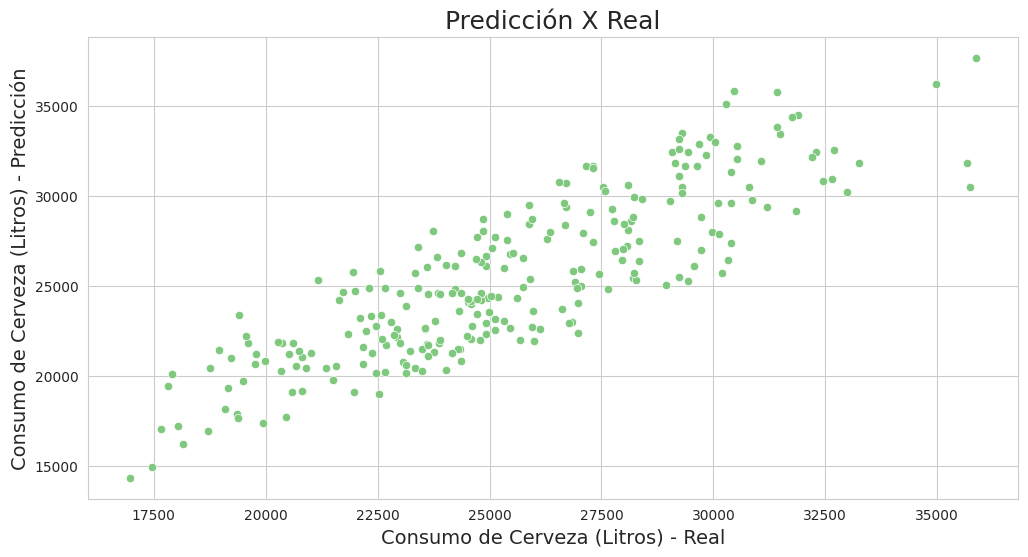

In [55]:
ax=sns.scatterplot(x= y_predicho_train, y= y_train)
ax.figure.set_size_inches(12, 6) # Tamaño del gráfico
ax.set_title('Predicción X Real', fontsize = 18) #  alejamos el titulo del gráfico
ax.set_ylabel('Consumo de Cerveza (Litros) - Predicción', fontsize = 14) # Agrega un titulo al eje y
ax.set_xlabel('Consumo de Cerveza (Litros) - Real', fontsize = 14) # Agrega un titulo al eje X
ax

En el grafico se puede observar que los puntos estan ajustados a su media. Sin embargo, los puntos ubicados al final se encuentran dispersos para valores mas altos del Consumo. Eso quiere decir que el ajuste delo modelo es mejor para valores más bajos del Consumo. Esta no es un a buena señal, Lo ideal es que todos los puntos esten ajustados.  Para comprender mejor lo que esta sucediendo, debemos analizar los residuos del modelo.

## Obteniendo los residuos

En un modelo de regresión lineal, los residuos (denotados comúnmente como u_i o e_i) son las diferencias entre los valores observados y los valores predichos por el modelo para cada una de las observaciones.



In [56]:
#Calculo de los residuos
residuo= y_train - y_predicho_train
residuo

,consumo
195,3891.289113
344,4040.499863
288,-3010.078635
59,-1704.289133
220,4223.837237
...,...
73,3186.229912
68,-739.805532
215,3010.236465
341,2588.394409


## Gráfico de dispersión entre valor estimado y residuos

Método informal para verificar la hipótesis de varianza constante de los residuos (homocedasticidad)

<Axes: title={'center': 'Residuos X Predicción'}, xlabel='Residuos', ylabel='Consumo de Cerveza (Litros) - Predicción'>

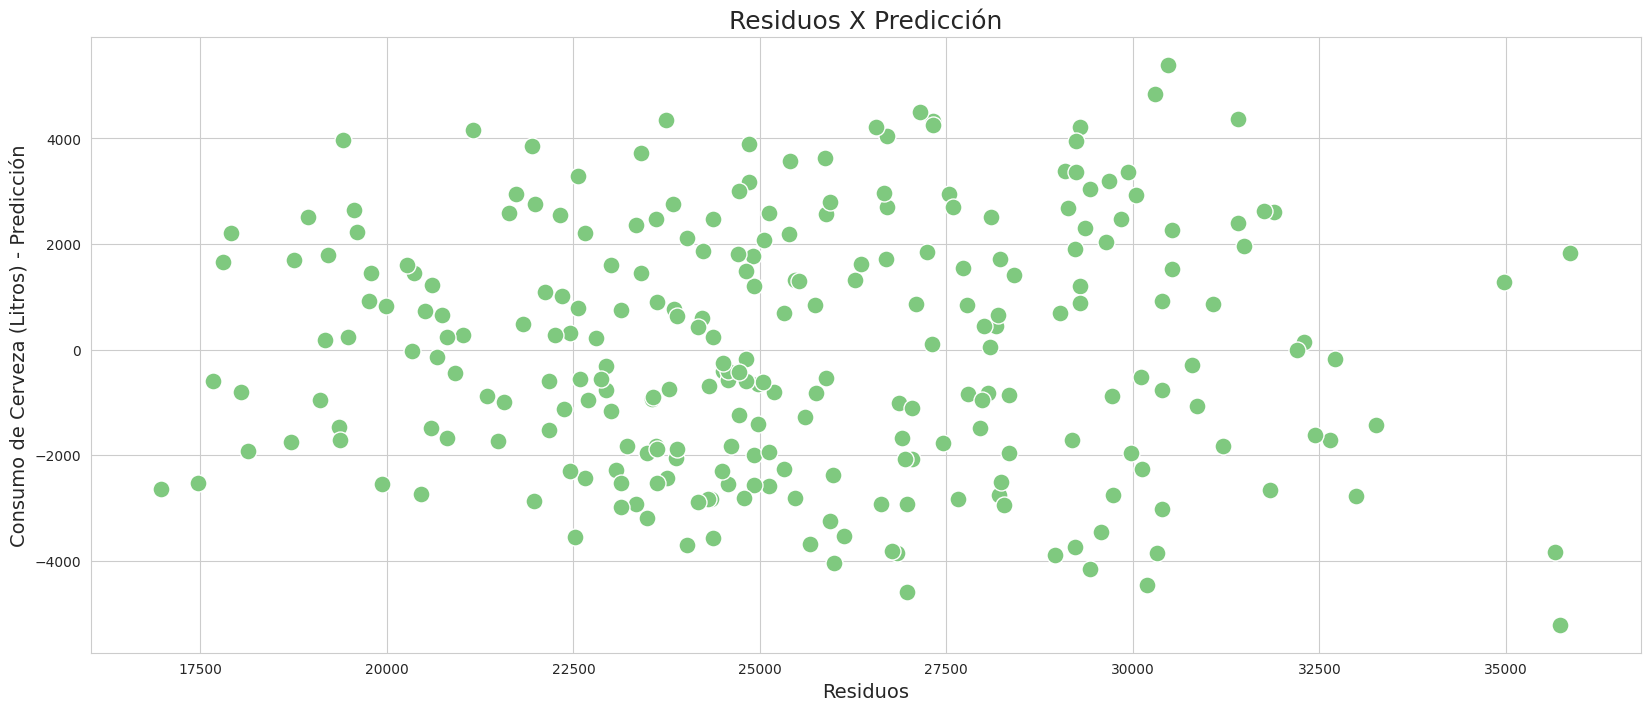

In [57]:
ax=sns.scatterplot(x= y_predicho_train, y= residuo, s=150) # 's=150' Aumenta el tamaño de los puntos para una mejor visualización
ax.figure.set_size_inches(20, 8) # Tamaño del gráfico
ax.set_title('Residuos X Predicción', fontsize = 18) #  alejamos el titulo del gráfico
ax.set_ylabel('Consumo de Cerveza (Litros) - Predicción', fontsize = 14) # Agrega un titulo al eje y
ax.set_xlabel('Residuos', fontsize = 14) # Agrega un titulo al eje X
ax

Es importante aclarar que la variación de los residuos sea constante para cumplir con el principio de homosedasticidad. Los resultados del Gráfico no muestran eso ya que los datos estan de los residuos estan muy dispersos.

**Principio de Homocedasticidad en los residuos de una regresión lineal**

El principio de homocedasticidad se refiere a la constancia de la varianza de los residuos (errores) de un modelo de regresión lineal, a lo largo de todos los niveles de las variables independientes (predictores). Es decir, la varianza de los residuos debe ser igual (constante) para todas las observaciones, sin importar los valores de las variables independientes.

**En términos simples:**
- Los residuos son las diferencias entre los valores observados (reales) y los valores predichos por el modelo.
- La homocedasticidad implica que los residuos tienen una varianza constante para cualquier valor de la variable independiente.

**¿Por qué es importante la homocedasticidad?**

Cuando se realiza una regresión lineal, se asume que los errores (residuos) del modelo son independientes entre sí y tienen varianza constante. Si esta suposición no se cumple (es decir, si los residuos muestran una varianza cambiante), los resultados del modelo pueden ser ineficientes y los tests de significancia (como el valor p) pueden ser incorrectos

## Usando los residuos al cuadrado

<img width='1500px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/var_u.jpg'>
Fuente: Econometria Básica - 5ª edición - Gujarati y Porter

Para comprobar si existe una variación constante graficamos los residuos elevandolos al cuadrado, de esta manera se generan valores posivos para evaluar un patrón o tendencia de los datos.
LA varianza constante de los residuos deben variar de forma aleatoria sin presentar ningun tipo de patrón o tendencia dentro de un rango determinado. Caso contrario, se confirmaría un fuerte indicadores depresencia de Heterocedasticidad.

**Heterocedasticidad**

Es una violación del supuesto de homocedasticidad en un modelo de regresión lineal. En términos simples, ocurre cuando la varianza de los residuos (o errores) no es constante a lo largo de los valores de las variables independientes (predictoras). Es decir, la dispersión de los errores varía en función del valor de las variables predictoras.

<Axes: title={'center': 'Residuos X Predicción'}, xlabel='Residuos', ylabel='Consumo de Cerveza (Litros) - Predicción'>

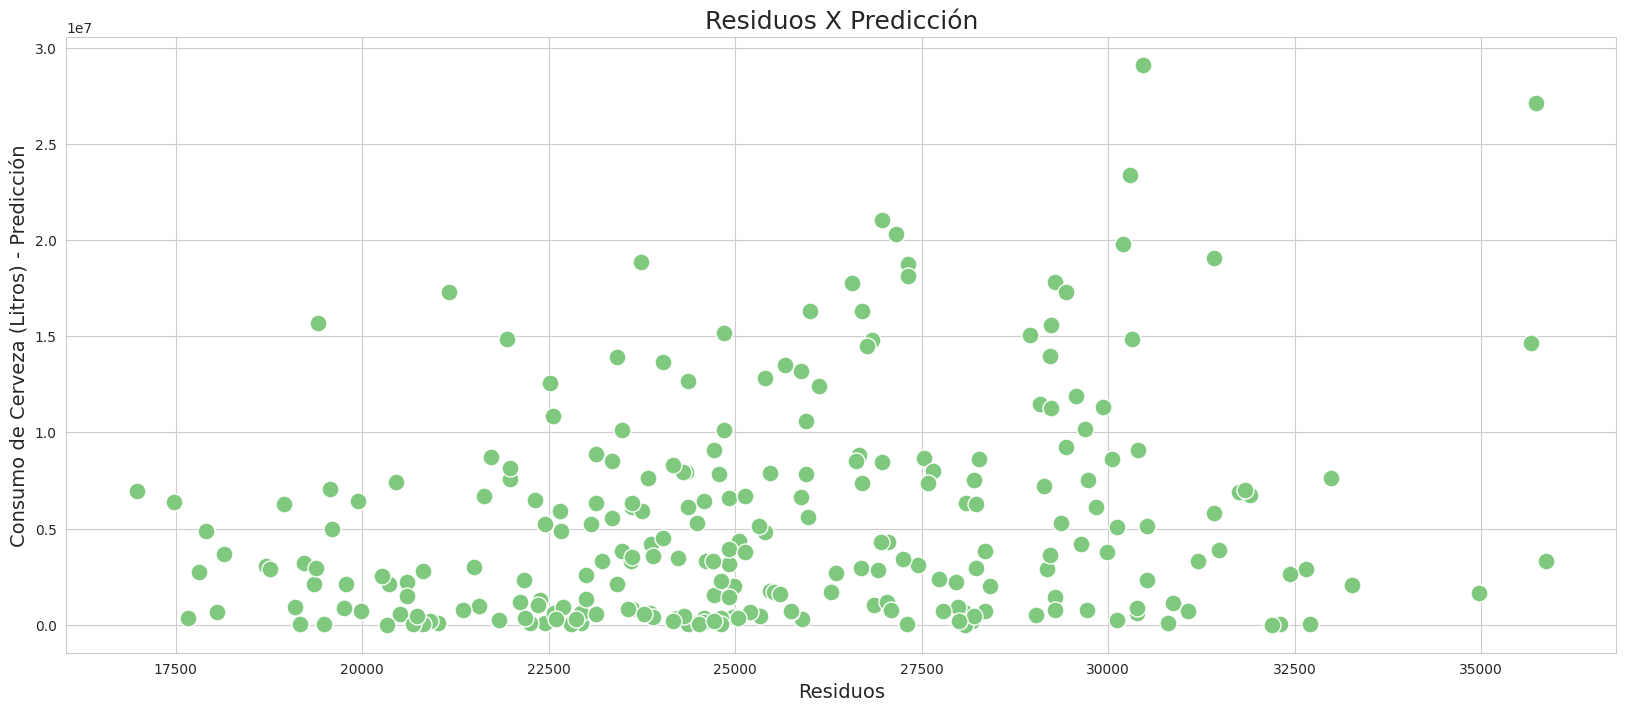

In [58]:
ax=sns.scatterplot(x= y_predicho_train, y= residuo**2, s=150) # 's=150' Aumenta el tamaño de los puntos para una mejor visualización
ax.figure.set_size_inches(20, 8) # Tamaño del gráfico
ax.set_title('Residuos X Predicción', fontsize = 18) #  alejamos el titulo del gráfico
ax.set_ylabel('Consumo de Cerveza (Litros) - Predicción', fontsize = 14) # Agrega un titulo al eje y
ax.set_xlabel('Residuos', fontsize = 14) # Agrega un titulo al eje X
ax

## Graficando la distribuición de frecuencias de los residuos

Este gráfico muestra un comportamiento similar al segundo gráfico, el cual muestra una tendencia creciente de la varianza de los residuos lo que indica que probablemente hay presencia de Heterocedasticidad en nuestro modelo.

Se observan muchos picos que sobresalen de la tendencia de una curva normal

<Axes: title={'center': 'Distribución de Frecuencias de los Residuos'}, xlabel='Litros', ylabel='Density'>

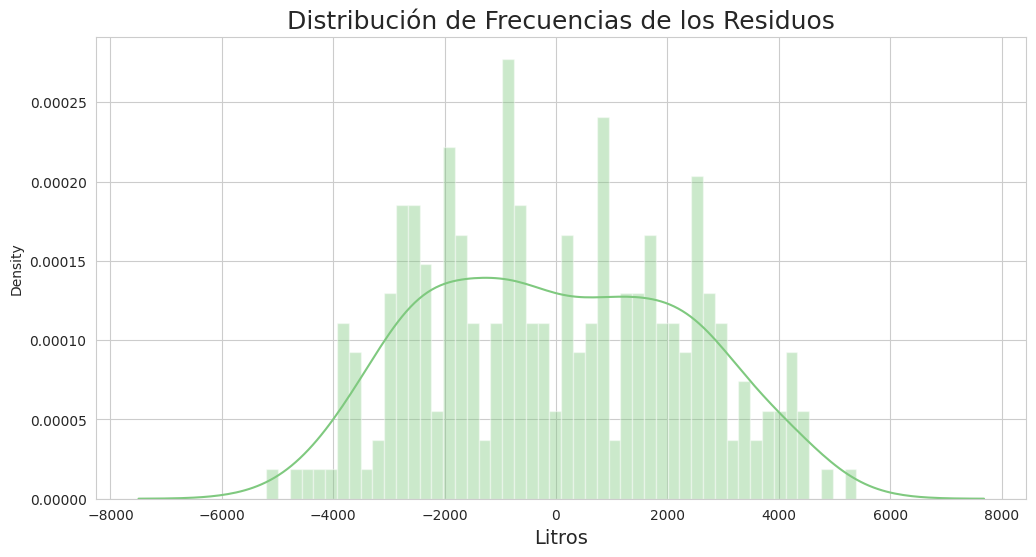

In [59]:
ax=sns.distplot(residuo, bins=50) #Aumentamos el número de barras con bins() para ver mejor la distribución de los datos
ax.figure.set_size_inches(12, 6) # Tamaño del gráfico
ax.set_title('Distribución de Frecuencias de los Residuos', fontsize = 18) #  alejamos el titulo del gráfico
ax.set_xlabel('Litros', fontsize = 14) # Agrega un titulo al eje X
ax

Lo que aprendimos:

- Cómo preparar los datos y crear datasets de entrenamiento y prueba
- Cómo verificar los tamaños de los archivos generados por la función train_test_split
- Cómo estimar un modelo de regresión lineal
- Cómo obtener predicciones puntuales
- Cómo interpretar los coeficientes estimados
- Cómo analizar gráficamente las predicciones

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>


<hr style='border: 2px solid red;'>

## Estimación de un nuevo modelo con la sustitución de la variable explicativa Temperatura máxima por Temperatura media.

In [60]:
x2 = datos[['temp_media', 'lluvia', 'fds']]

## Creando los datasets de entrenamiento y de prueba

In [61]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2,y,test_size=0.3,random_state=2811)

## Instanciar la clase *LinearRegression()*

In [62]:
modelo_2= LinearRegression()

## Usando el método *fit()* del objeto "modelo_2" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y2_train e X2_train)

In [63]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

## Obteniendo el coeficiente de determinación (R²) del nuevo modelo estimado y comparando con el resultado del modelo anterior

In [64]:
print('Modelos con Temp. Media')
print('R² ={}'.format(round(modelo_2.score(X2_train, y2_train), 2))) # Este modeo tiene un R²  más bajo

Modelos con Temp. Media
R² =0.66


In [65]:
print('Modelos con Temp. Máxima')
print('R² ={}'.format(round(modelo.score(X_train, y_train), 2))) # Este modeo tiene un R²  másajsutado a los datos

Modelos con Temp. Máxima
R² =0.73


## Generando predicciones para los datos de PRUEBA (X_test e X2_test) con el método *predict()* de los objetos "modelo" e "modelo_2"

In [66]:
y_predicho_2 = modelo_2.predict(X2_test)
y_predicho = modelo.predict(X_test)

## Obteniendo el coeficiente de determinación (R²) para las predicciones de los dos modelos

In [67]:
print('Modelos con Temp. Media')
print('R² ={}'.format(round(metrics.r2_score(y2_test, y_predicho_2), 2)))

Modelos con Temp. Media
R² =0.66


In [68]:
print('Modelos con Temp. Máxima')
print('R² ={}'.format(round(metrics.r2_score(y_test, y_predicho), 2)))

Modelos con Temp. Máxima
R² =0.69


El modelo anterior continua presentando un mejor coeficiente de ajuste para los datos de prueba.

- La comparación entre modelos solo es posible cuando la variable dependiente de los modelos que se comparan es la misma.La comparación entre modelos con diferentes variables dependientes no es válida.
- Una de las formas de evaluar la comparación y poder decidir cuál es el mejor modelo, es a través de la observación de los coeficientes de determinación de los modelos comparados.  R² es una métrica que nos dice qué parte de la variación en la variable dependiente se explica por nuestro ajuste. Los valores más cercanos a 1 indican modelos mejor ajustados.

# <font color='red' style='font-size: 30px;'>Otras Métricas de Regresión</font>
<hr style='border: 2px solid red;'>

## Métricas da regresión
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algunas estadísticas obtenidas del modelo de regresión son muy útiles como criterio para comparar varios modelos estimados y seleccionar el mejor modelo. Las principales métricas de regresión que scikit-learn pone a disposición para los modelos lineales son las siguientes:

### Error Cuadrático Medio

Media de los cuadrados de los errores. Los mejores ajustes tienen un $EQM$ más bajo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz del Error Cuadrático Medio

Raíz cuadrada de la media de los cuadrados de los errores. Los mejores ajustes tienen un $\sqrt{EQM}$ más bajo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

La dieferencia entre las dos es que la primera métrica se expresa en unidades cuadradas. Es decir, nos da información en litros al cuadrado en este caso.
Mientras que la segunda métrica se expresa en la musma unidad que la variable dependiente. Es decir, representa la variación media del error de pronostico en litros.

A diferencia del R cuadrado el objetivo es minimizar el valor de estas dos métricas

## Obteniendo métricas para el modelo con Temperatura Media

In [69]:
EQM_2 = round(metrics.mean_squared_error(y2_test, y_predicho_2), 2)
REQM_2= round(np.sqrt(EQM_2),2)

R2_2= round(metrics.r2_score(y2_test, y_predicho_2),2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM_2', 'REQM_2', 'R2_2'], columns=['Métricas'])

,Métricas
EQM_2,6060775.46
REQM_2,2461.86
R2_2,0.66


## Obteniendo métricas para el modelo con Temperatura Máxima

In [70]:
EQM = round(metrics.mean_squared_error(y_test, y_predicho), 2)
REQM= round(np.sqrt(EQM),2)

R2= round(metrics.r2_score(y_test, y_predicho),2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R2'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R2,0.69


Al comparar los resultados es posible identificar que el modelo original que utiliza la temperatura máxima produce menores errores de predicción (EQM, REQM)y una mayor capacidad de ajuste (R2).

Por tanto, se concluye que:
- El módelo antiguo es el más apropiado para predecir el Consumo.
- El uso de las Métrica de error permite comparar modelos con diferentes variables explicativas
- El R2 solo es apropiado cuando comparamos modelos con la misma cantidad de variables explicativas, Esto se debe a que el R2 tiene a aumentar de valor al agregar mas variables al modelo, incluso si se agregan variables que no ayudan a predecir la variable dependiente  esto es lo que se conoce como el problema de  overfitting (o sobreajuste). en el peor de los casos R2 siempre permanecera constante pero nunca disminuira de valor. Por tanto, un modelo que tiene más variables explicativas no generará errores de pronostico más bajos que un modelo con menos variables explicativas.




**El problema de Overfitting y el comportamiento del R²**

El overfitting (o sobreajuste) es un problema común en modelos de aprendizaje automático y estadística que ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento, capturando incluso el ruido o las fluctuaciones aleatorias que no representan una relación real en los datos. Esto puede hacer que el modelo tenga un rendimiento muy bueno en el conjunto de entrenamiento pero pobre en los datos de prueba o en datos no vistos, ya que no generaliza correctamente a nuevos datos.

**¿Por qué ocurre el overfitting?**

- Modelo demasiado complejo: El overfitting ocurre cuando el modelo tiene demasiados parámetros o variables y es lo suficientemente flexible como para "aprender" detalles específicos de los datos de entrenamiento. En lugar de aprender solo las relaciones generales (que se aplican también a nuevos datos), el modelo también aprende las peculiaridades o el ruido de los datos de entrenamiento.

- Demasiadas variables: Si agregamos muchas variables al modelo, incluso si no son relevantes para la variable dependiente, el modelo podría aprender relaciones espurias o innecesarias que no tienen un valor predictivo real.


Lo que aprendimos:
- Cómo estimar un nuevo modelo, pero esta vez usando otra variable explicativa
- Cómo crear los conjuntos de entrenamiento y prueba del nuevo modelo
- Cómo comparar los dos modelos
- Otras métricas de regresión: error cuadrático medio y su raíz

# <font color='red' style='font-size: 30px;'>Guardando y cargando el modelo estimado</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

In [71]:
X_test[0:1]

,temp_max,lluvia,fds
5,30.5,12.2,0


In [73]:
entrada =X_test[0:1]

## Generando predicción puntual

In [74]:
modelo.predict(entrada)[0]

26094.901775262017

## Creando un simulador simple

In [75]:
temp_max = 30.5
lluvia = 12.2
fds = 0
entrada=[[temp_max, lluvia, fds]]

print('{} litros'.format(round(modelo.predict(entrada)[0], 2)))

26094.9 litros


## Guardando el modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El módulo <b> pickle </b> implementa protocolos binarios para serializar y deserializar la estructura de un objeto Python.</p>

**¿Qué es la serialización y deserialización?**

**Serialización:** Es el proceso de convertir un objeto de Python en una secuencia de bytes que puede ser almacenada en un archivo o transmitida a través de una red.

**Deserialización:** Es el proceso inverso, es decir, convertir una secuencia de bytes que representa un objeto serializado de vuelta a un objeto de Python en su forma original.

**¿Para qué se utiliza pickle?**

**Guardar el estado de los objetos:**

Puedes usar pickle para guardar el estado de objetos como listas, diccionarios, instancias de clases, etc., en un archivo. Esto es útil si necesitas persistir datos complejos entre ejecuciones del programa.

**Almacenar modelos entrenados: **

En el contexto de aprendizaje automático, pickle se utiliza comúnmente para guardar un modelo entrenado, de manera que puedas cargarlo y usarlo en el futuro sin necesidad de volver a entrenarlo. Por ejemplo, después de entrenar un modelo de regresión o clasificación con scikit-learn, puedes "guardar" el modelo y cargarlo cuando lo necesites.
Transporte de datos complejos:

Puedes usar pickle para serializar objetos complejos y enviarlos a través de la red o almacenarlos en una base de datos.

In [76]:
import pickle

In [77]:
#Guardar el modelo estimado en la memoria
output =open('modelo_consumo_cerveza','wb')
pickle.dump(modelo, output)
output.close()

ubicamos 'modelo_consumo_cerveza' en la carpeta y damos clic en los tres puntos para posteriormente descargar el archivo.

Esta función permite cargar el modelo de manera resumida en un nuevo notebook, simplemente cargando el siguiente código y subiendo el documento guardado 'modelo_consumo_cerveza' a Google Colab

Con el siguiente script podemos utilizar el modelo estimado:

### En un nuevo notebook/proyeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveza','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
lluvia = 12.2
fds = 0
entrada = [[temp_max, lluvia, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```

En nuestro curso, usamos la biblioteca pickle para guardar nuestro modelo estimado en un archivo binario. Este procedimiento nos permite reutilizar nuestro modelo, sin tener que volver a ejecutar todo el proceso de estimación.

En nuestro proyecto solo se utilizaron dos características de la biblioteca pickle, una para almacenar el modelo en un archivo y la otra para cargar en la memoria el modelo almacenado en este archivo.

pickle.dump() y pickle.load()


Al revisando el contenido hasta ahora, se concluye las siguientes afirmaciones:

- El coeficiente de correlación es una medida de asociación lineal entre dos variables y está entre -1 y +1, donde -1 indica una asociación negativa perfecta y +1 indica una asociación positiva perfecta.

- El jointplot(), de la biblioteca seaborn, grafica la relación entre dos variables y sus respectivas distribuciones de frecuencia

- Los diagramas de dispersión entre la variable dependiente (Y) y las variables explicativas (X’s) nos ayudan a identificar la presencia de una relación lineal entre las variables:

- Cuando agregamos una variable explicativa a nuestro modelo, es posible que la métrica R² tenga un aumento en su valor;

- Mediante un histograma, podemos evaluar de forma preliminar si la variable dependiente sigue una distribución normal.


Lo que aprendimos:

- Cómo guardar y cargar el modelo estimado usando la biblioteca pickle
- Como crear un simulador interactivo para Google Colab